In [1]:
import numpy as np
import pandas as pd

In [2]:
dtype_dict = {'STATE_CODE_001': int,
 'STRUCTURE_NUMBER_008': str,
 'SERVICE_LEVEL_005C': int,
 'DIRECTION_005E': int,
 'FUNCTIONAL_CLASS_026': int,
 'YEAR_BUILT_027': int,
 'TRAFFIC_LANES_ON_028A': int,
 'TRAFFIC_LANES_UND_028B': int,
 'ADT_029': float,
 'MEDIAN_CODE_033': int,
 'DEGREES_SKEW_034': float,
 'STRUCTURE_FLARED_035': int,
 'OPEN_CLOSED_POSTED_041': int,
 'SERVICE_ON_042A': int,
 'SERVICE_UND_042B': int,
 'STRUCTURE_KIND_043A': int,
 'STRUCTURE_TYPE_043B': int,
 'APPR_KIND_044A': int,
 'APPR_TYPE_044B': int,
 'MAIN_UNIT_SPANS_045': float,
 'APPR_SPANS_046': float,
 'MAX_SPAN_LEN_MT_048': float,
 'STRUCTURE_LEN_MT_049': float,
 'DECK_COND_058': int,
 'SUPERSTRUCTURE_COND_059': int,
 'SUBSTRUCTURE_COND_060': int,
 'CHANNEL_COND_061': int,
 'CULVERT_COND_062': int,
 'OPERATING_RATING_064': float,
 'DECK_GEOMETRY_EVAL_068': int,
 'WATERWAY_EVAL_071': int,
 'APPR_ROAD_EVAL_072': int,
 'INSPECT_FREQ_MONTHS_091': float,
 'YEAR_RECONSTRUCTED_106': float,
 'DECK_STRUCTURE_TYPE_107': int,
 'SURFACE_TYPE_108A': int,
 'MEMBRANE_TYPE_108B': int,
 'DECK_PROTECTION_108C': int,
 'PERCENT_ADT_TRUCK_109': float,
 'SCOUR_CRITICAL_113': int,
 'SUFFICIENCY_RATING': float,
 'YEAR': int,
 'FRACTURE_FLAG_092AF': int,
 'UNDWATER_FLAG_092BF': int,
 'SPEC_FLAG_092AF': int,
 'INSPECT_FLAG_090F': int,
 'REL_BRIGDE_AGE': float,
 'STRUCTURE_NUMBER_008_ID': int
}

In [3]:
# load data into pandas df
file_path = "D:/Scripts/bridges_project/data/masterBridgesFinal.csv"

mylist = []

for chunk in pd.read_csv(file_path, dtype= dtype_dict, chunksize=1000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [ ]:
big_data.head()

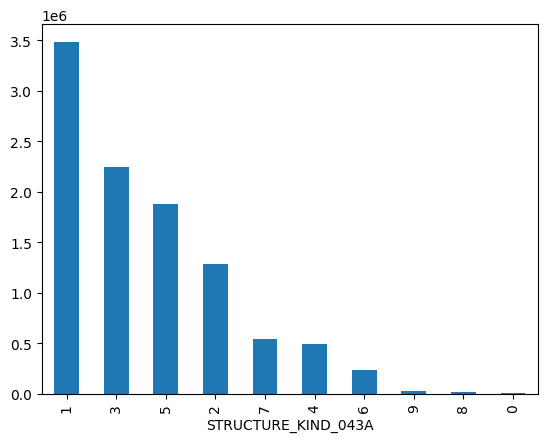

In [4]:
big_data.STRUCTURE_KIND_043A.value_counts().plot(kind= 'bar');

In [6]:
concreteDF = big_data.loc[(big_data['STRUCTURE_KIND_043A'] == 1) | (big_data['STRUCTURE_KIND_043A'] == 2) | (big_data['STRUCTURE_KIND_043A'] == 5)
| (big_data['STRUCTURE_KIND_043A'] == 6)]

In [7]:
steelDF = big_data.loc[(big_data['STRUCTURE_KIND_043A'] == 3) | (big_data['STRUCTURE_KIND_043A'] == 4)]

In [8]:
woodDF = big_data.loc[(big_data['STRUCTURE_KIND_043A'] == 7)]

In [9]:
otherDF = big_data.loc[(big_data['STRUCTURE_KIND_043A'] == 8) | (big_data['STRUCTURE_KIND_043A'] == 9) | (big_data['STRUCTURE_KIND_043A'] == 0)]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

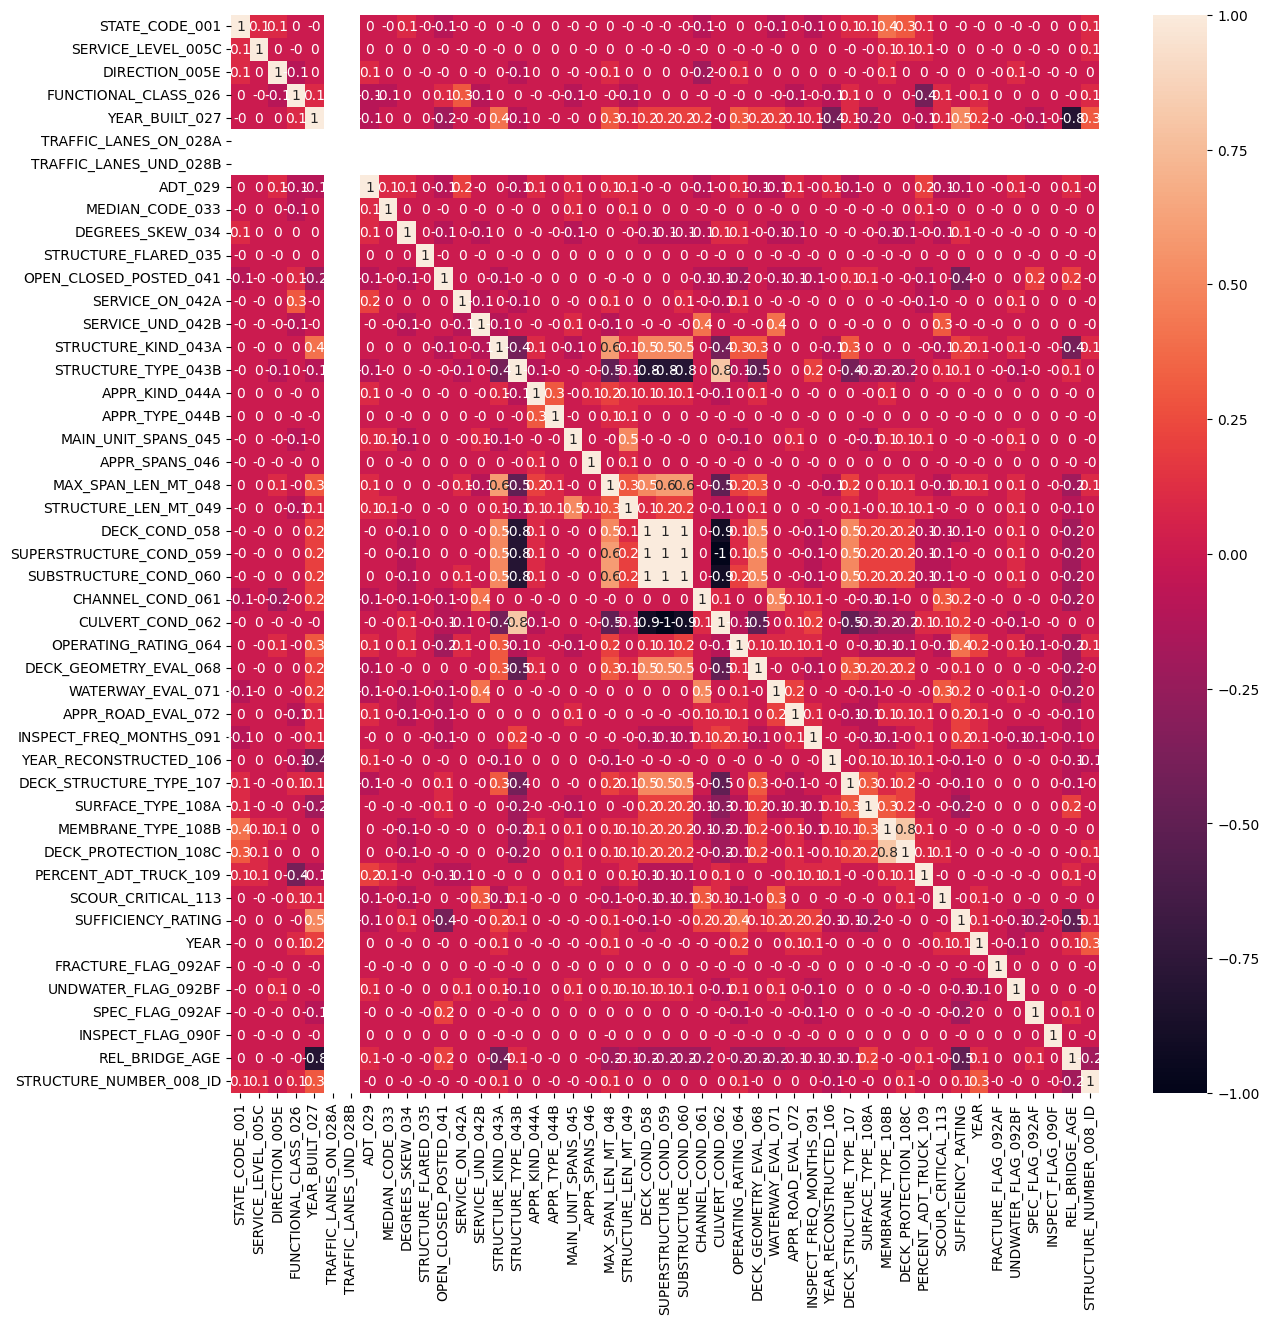

In [24]:
# create correlation matrix for concrete bridges
corr_db = concreteDF.corr(numeric_only= True)
fig = plt.figure(figsize= (14, 14))
sns.heatmap(corr_db.round(1), annot= True)
plt.show;

In [25]:
upper_corr_mat = corr_db.where(np.triu(np.ones(corr_db.shape), k= 1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
concrete_sorted_mat = unique_corr_pairs.sort_values()

In [26]:
del corr_db

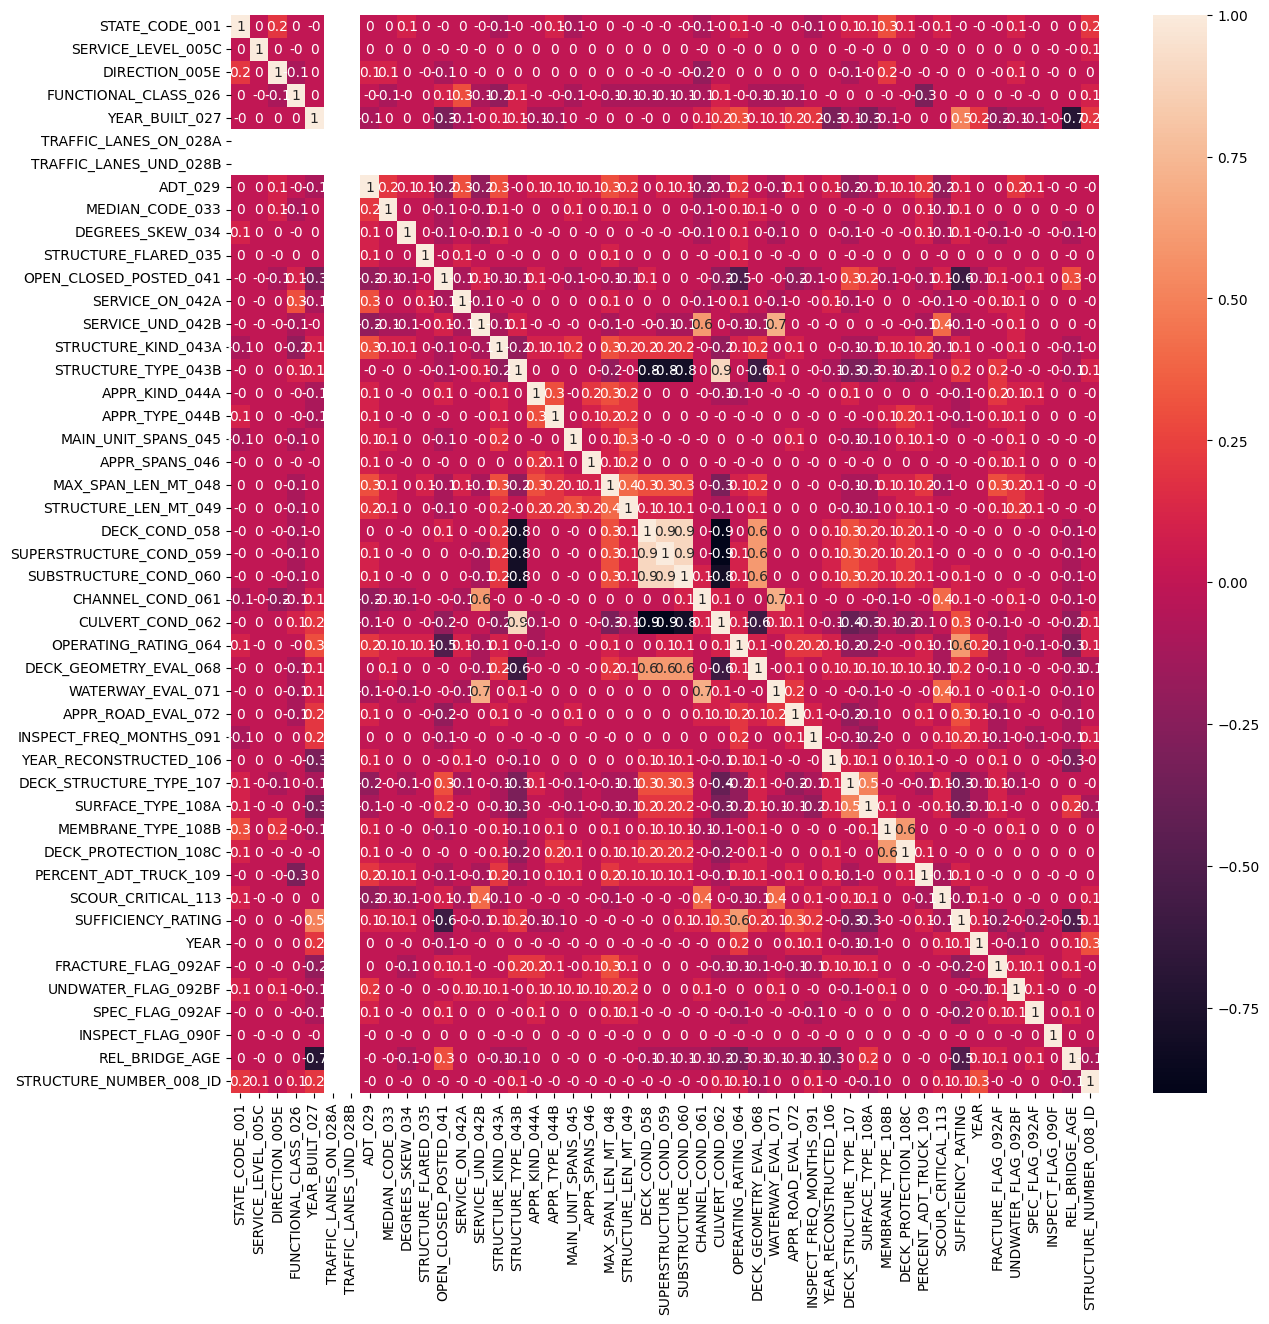

In [27]:
# create correlation matrix for steel bridges
corr_db = steelDF.corr(numeric_only= True)
fig = plt.figure(figsize= (14, 14))
sns.heatmap(corr_db.round(1), annot= True)
plt.show;

In [28]:
upper_corr_mat = corr_db.where(np.triu(np.ones(corr_db.shape), k= 1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
steel_sorted_mat = unique_corr_pairs.sort_values()

In [29]:
del corr_db

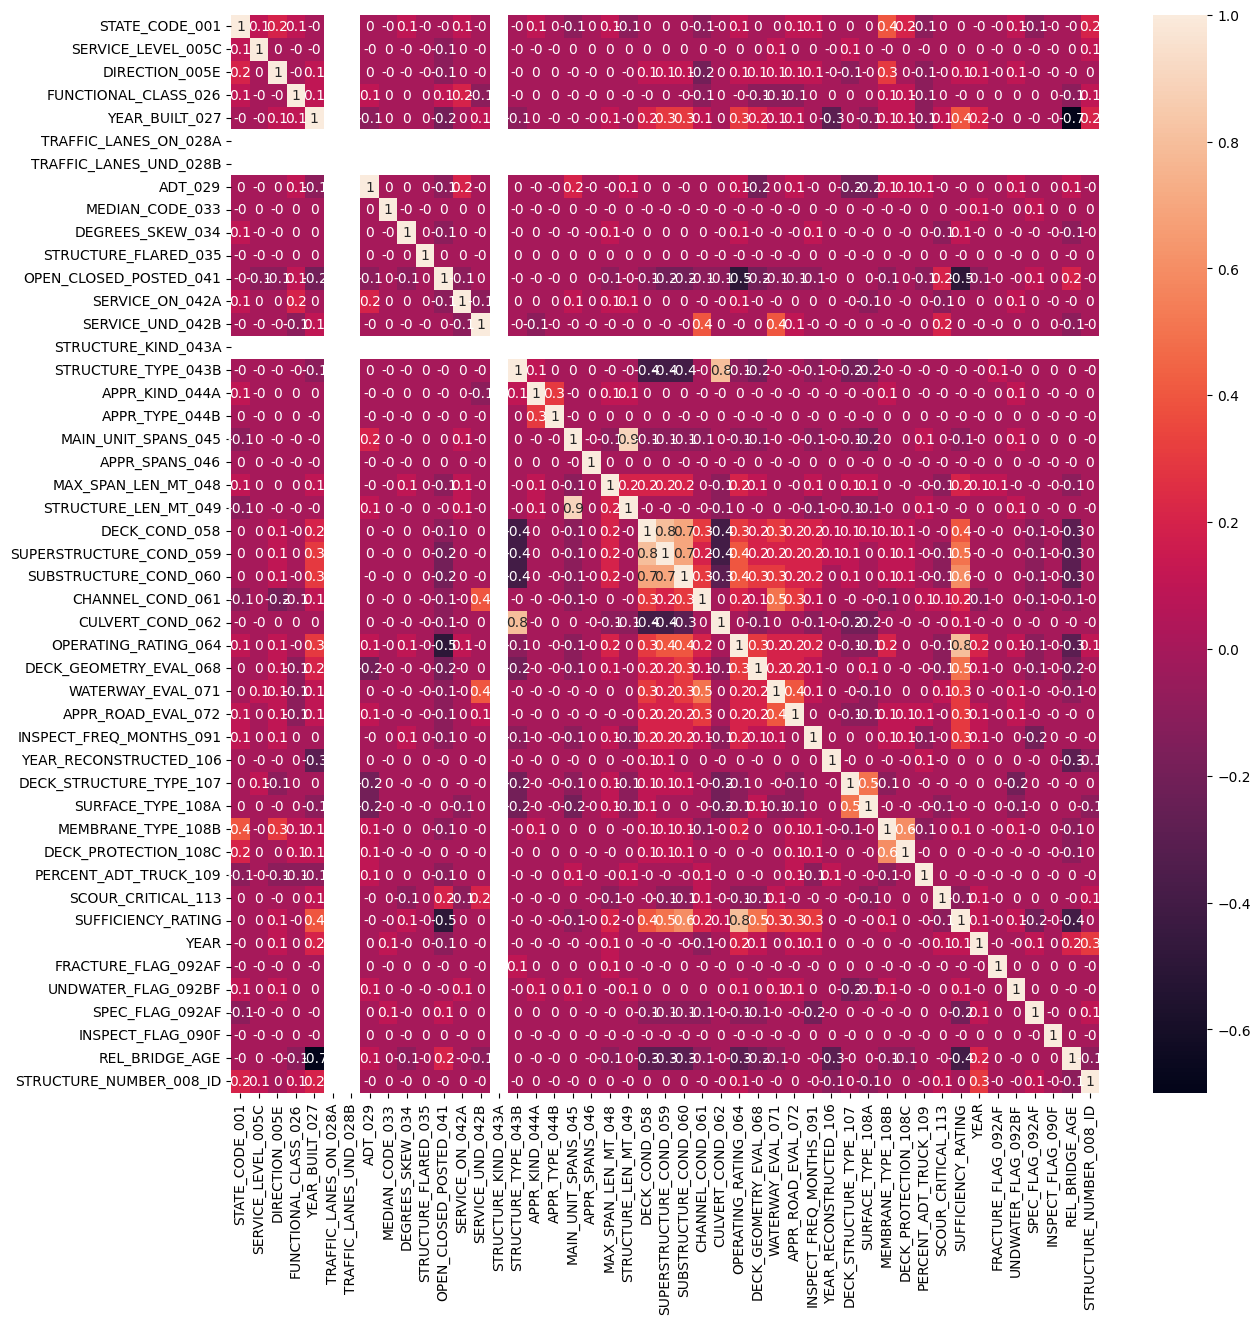

In [30]:
# create correlation matrix for wood bridges
corr_db = woodDF.corr(numeric_only= True)
fig = plt.figure(figsize= (14, 14))
sns.heatmap(corr_db.round(1), annot= True)
plt.show;

In [31]:
upper_corr_mat = corr_db.where(np.triu(np.ones(corr_db.shape), k= 1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
wood_sorted_mat = unique_corr_pairs.sort_values()

In [32]:
del corr_db

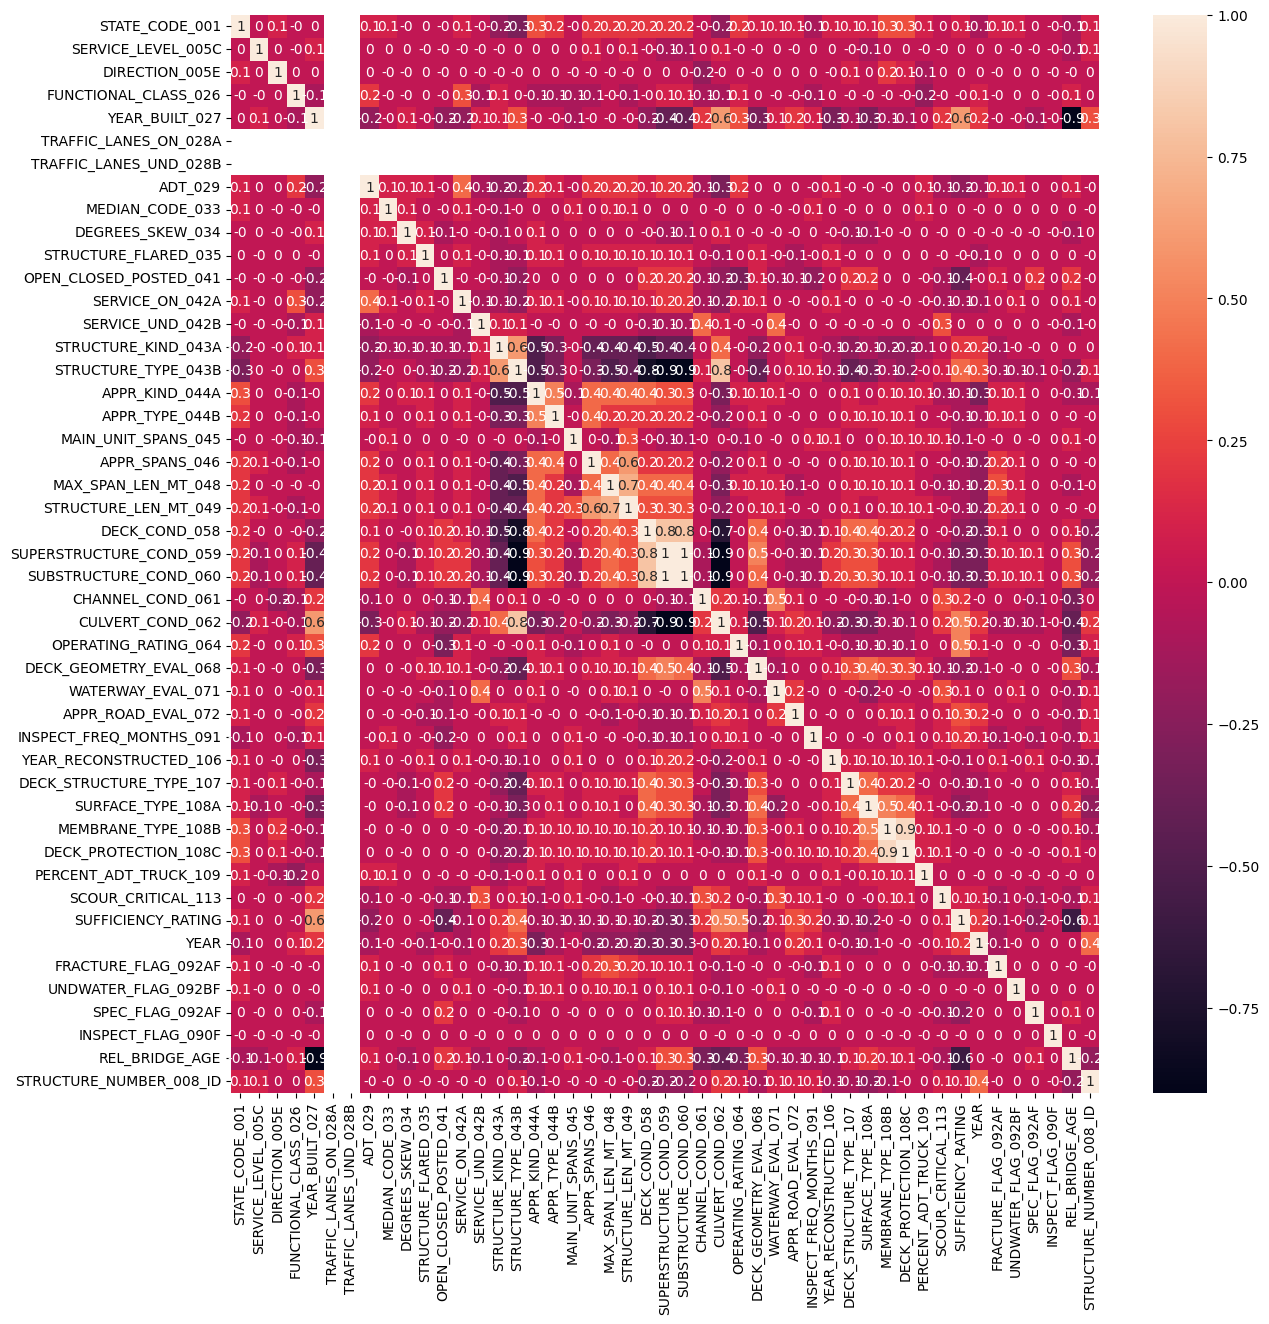

In [33]:
# create correlation matrix for other bridges
corr_db = otherDF.corr(numeric_only= True)
fig = plt.figure(figsize= (14, 14))
sns.heatmap(corr_db.round(1), annot= True)
plt.show;

In [34]:
upper_corr_mat = corr_db.where(np.triu(np.ones(corr_db.shape), k= 1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
other_sorted_mat = unique_corr_pairs.sort_values()

In [35]:
del corr_db

In [41]:
concrete_sorted_mat.index

MultiIndex([(       'CULVERT_COND_062', 'SUPERSTRUCTURE_COND_059'),
            (       'CULVERT_COND_062',   'SUBSTRUCTURE_COND_060'),
            (       'CULVERT_COND_062',           'DECK_COND_058'),
            (  'SUBSTRUCTURE_COND_060',     'STRUCTURE_TYPE_043B'),
            ('SUPERSTRUCTURE_COND_059',     'STRUCTURE_TYPE_043B'),
            (         'REL_BRIDGE_AGE',          'YEAR_BUILT_027'),
            (          'DECK_COND_058',     'STRUCTURE_TYPE_043B'),
            (       'CULVERT_COND_062',     'MAX_SPAN_LEN_MT_048'),
            ( 'DECK_GEOMETRY_EVAL_068',        'CULVERT_COND_062'),
            (    'MAX_SPAN_LEN_MT_048',     'STRUCTURE_TYPE_043B'),
            ...
            (      'WATERWAY_EVAL_071',        'CHANNEL_COND_061'),
            (   'STRUCTURE_LEN_MT_049',     'MAIN_UNIT_SPANS_045'),
            (    'MAX_SPAN_LEN_MT_048',     'STRUCTURE_KIND_043A'),
            ('SUPERSTRUCTURE_COND_059',     'MAX_SPAN_LEN_MT_048'),
            (  'SUBSTRUCTURE_CON

In [46]:
mats = [concrete_sorted_mat, steel_sorted_mat, wood_sorted_mat, other_sorted_mat]
for mat in mats:
    print(mat.name)
    for pair, value in mat.items():
        if np.abs(value) >= 0.5:
            print(pair, value)

None
('CULVERT_COND_062', 'SUPERSTRUCTURE_COND_059') -0.9509233228347782
('CULVERT_COND_062', 'SUBSTRUCTURE_COND_060') -0.9477156667792761
('CULVERT_COND_062', 'DECK_COND_058') -0.9275256450513653
('SUBSTRUCTURE_COND_060', 'STRUCTURE_TYPE_043B') -0.8245499458351783
('SUPERSTRUCTURE_COND_059', 'STRUCTURE_TYPE_043B') -0.8220767690734326
('REL_BRIDGE_AGE', 'YEAR_BUILT_027') -0.8132367779303135
('DECK_COND_058', 'STRUCTURE_TYPE_043B') -0.8073495017555068
('CULVERT_COND_062', 'MAX_SPAN_LEN_MT_048') -0.5284557787554122
('DECK_GEOMETRY_EVAL_068', 'CULVERT_COND_062') -0.5065733291813037
('DECK_GEOMETRY_EVAL_068', 'DECK_COND_058') 0.5203509510797435
('DECK_GEOMETRY_EVAL_068', 'SUPERSTRUCTURE_COND_059') 0.5285234011774405
('DECK_GEOMETRY_EVAL_068', 'SUBSTRUCTURE_COND_060') 0.5287275384371934
('DECK_COND_058', 'MAX_SPAN_LEN_MT_048') 0.5339943024937874
('WATERWAY_EVAL_071', 'CHANNEL_COND_061') 0.543702497005375
('STRUCTURE_LEN_MT_049', 'MAIN_UNIT_SPANS_045') 0.5445500086366138
('MAX_SPAN_LEN_MT_04

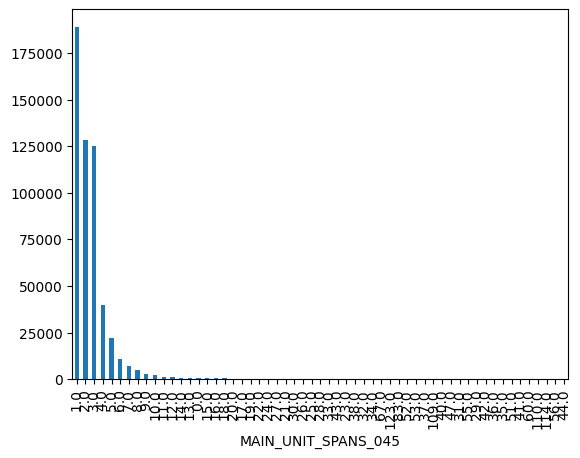

In [47]:
woodDF.MAIN_UNIT_SPANS_045.value_counts().plot(kind= 'bar');

In [ ]:
woodDF.STRUCTURE_LEN_MT_049.value_counts().plot(kind= 'bar');

In [58]:
concreteDF.DECK_COND_058.value_counts()

DECK_COND_058
-1    2223892
 7    1814331
 8    1183025
 6     875944
 5     392426
 9     254916
 4     111425
 3      23593
 2       3212
 0       1964
 1        688
Name: count, dtype: int64

In [59]:
concreteDF.SUPERSTRUCTURE_COND_059.value_counts()

SUPERSTRUCTURE_COND_059
-1    2170067
 7    1621091
 8    1476746
 6     764604
 5     386051
 9     297188
 4     133322
 3      30248
 2       3580
 0       2027
 1        492
Name: count, dtype: int64

In [60]:
concreteDF.SUBSTRUCTURE_COND_060.value_counts()

SUBSTRUCTURE_COND_060
-1    2164962
 7    1650117
 8    1214182
 6     907250
 5     455913
 9     279958
 4     161235
 3      37350
 2      10584
 0       2239
 1       1626
Name: count, dtype: int64

In [61]:
concreteDF.CHANNEL_COND_061.value_counts()

CHANNEL_COND_061
 7    2320011
 8    1710680
 6    1625628
 5     603184
 9     245640
-1     199595
 4     156389
 3      20505
 2       2049
 0       1358
 1        377
Name: count, dtype: int64

In [62]:
concreteDF.CULVERT_COND_062.value_counts()

CULVERT_COND_062
-1    4721798
 7     955957
 6     490057
 8     464493
 5     130501
 9      90017
 4      25839
 3       5526
 2        878
 0        216
 1        134
Name: count, dtype: int64